In [37]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

In [38]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [39]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "comparing convnet and MLP"
for model_layers in [[
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
    [
        layers.Flatten(input_shape=input_picture_shape),
        layers.Dense(units=100, activation=ACT_RELU),
        layers.Dense(units=50, activation=ACT_RELU),
        layers.Dense(num_classes, activation='softmax'),
    ]]:
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
all_titles.append("convnet")
all_titles.append("MLP")
all_descriptions

[0  n          type filters kernel_size activation pool_size strides units
 1             None    None        None       None      None    None  None
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3        Conv2D      64      (3, 3)       relu                        
 5  4  MaxPooling2D                                   (2, 2)  (1, 1)      
 6             None    None        None       None      None    None  None
 7  6         Dense                                                     10,
 0  n   type filters kernel_size activation pool_size strides units
 1      None    None        None       None      None    None  None
 2  1  Dense                                                    100
 3  2  Dense                                                     50
 4  3  Dense                                                     10]

In [40]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [41]:
batch_size = 128
epochs = 20
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    all_history.append(history)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/20
422/422 [==============================] - 41s 96ms/step - loss: 0.1599 - accuracy: 0.9524 - val_loss: 0.0561 - val_accuracy: 0.9855
Epoch 2/20
422/422 [==============================] - 39s 93ms/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.0412 - val_accuracy: 0.9890
Epoch 3/20
422/422 [==============================] - 39s 93ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 4/20
422/422 [==============================] - 39s 93ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0363 - val_accuracy: 0.9908
Epoch 5/20
422/422 [==============================] - 40s 94ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0457 - val_accuracy: 0.9892
Epoch 6/20
422/422 [==============================] - 40s 94ms/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0421 - val_accuracy: 0.9902
Epoch 7/20
422/422 [==============================] - 40s 94ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0512 - val_accuracy:

 50%|█████     | 1/2 [13:09<13:09, 789.37s/it]

Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.3519 - accuracy: 0.9011 - val_loss: 0.1490 - val_accuracy: 0.9590
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1556 - accuracy: 0.9545 - val_loss: 0.1164 - val_accuracy: 0.9682
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1110 - accuracy: 0.9670 - val_loss: 0.0888 - val_accuracy: 0.9747
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9741 - val_loss: 0.0878 - val_accuracy: 0.9765
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0825 - val_accuracy: 0.9782
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9825 - val_loss: 0.0921 - val_accuracy: 0.9737
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9855 - val_loss: 0.0820 - val_accuracy: 0.9777
Epoch 

100%|██████████| 2/2 [13:36<00:00, 408.09s/it]


In [42]:
# score = model.evaluate(x_test, y_test, verbose=0)

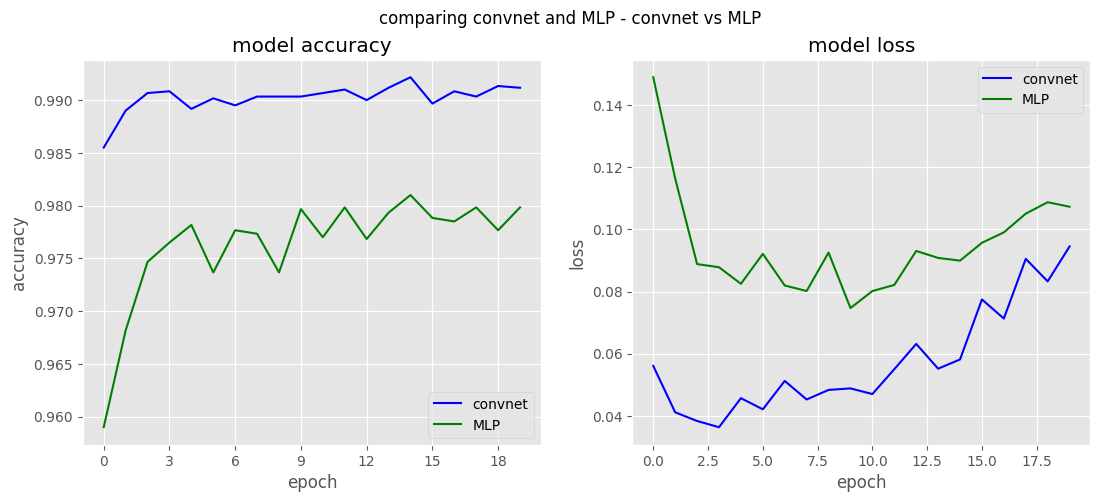

In [43]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)